<a href="https://colab.research.google.com/github/totheBrenda/portfolio/blob/main/p001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **데이터 전처리**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Files/pf/p1.csv', index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 1. 결측치 처리
전체 데이터 16598개 중 결측치를 가진 357개 행은 3% 미만으로,

데이터 분석에 큰 영향을 미치지 않을 것이라 판단하여 삭제한다.

In [ ]:
df = df.dropna()

### 2. Year
연도 표기 방식이 혼용되어 있어 4자리 정수로 통일시킨다.

In [ ]:
def filter(year) :
  if 0 <= year <= 20:
    return int(year) + 2000
  elif 80 <= year <= 99 :
    return int(year) + 1900
  else :
    return int(year)

df['Year'] = df['Year'].apply(filter)

### 3. Sales
일부 숫자는 K와 M 단위로 표기 되어 있다.

Sales의 단위는 M으로, 형식은 float로 통일시킨다.

In [ ]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def flo(sales) :
  if 'M' in sales :
    r1 = float(sales.replace('M', ''))
    return r1
  elif 'K' in sales :
    r2 = float(sales.replace('K', '')) / 1000
    return r2
  else :
    return float(sales)

for col in cols :
  df[col] = df[col].apply(flo)


# EDA

### 1. 지역에 따라 선호하는 게임 장르 확인

지역마다 매출 규모가 다르기 때문에 표준화 된 값으로 비교한다.

In [ ]:
eda1 = df.groupby('Genre').sum().drop('Year', axis=1).reset_index()
idx1 = eda1['Genre']
eda1 = pd.DataFrame(StandardScaler().fit_transform(eda1.drop('Genre', axis=1)),
                    columns=cols, index=idx1) + 1.25

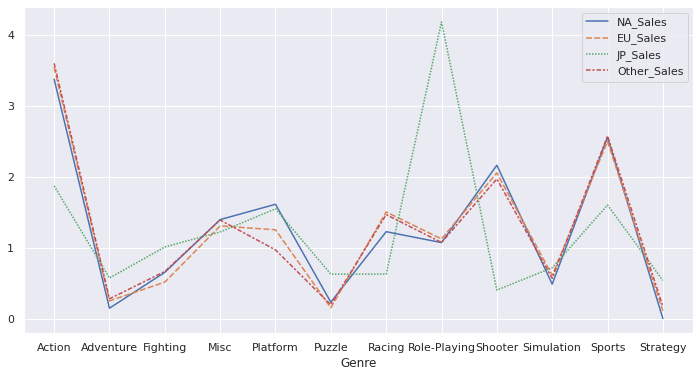

In [ ]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.lineplot(data=eda1);

### 2. 연도별 게임의 트렌드 확인
장르의 전체 매출액을 구하여 상위 5개의 장르를 확인한다.

In [ ]:
eda2 = df.drop('Year', axis=1).groupby('Genre').sum()
eda2['total'] = eda2.sum(axis=1)
eda2 = eda2.sort_values('total', ascending=False)
idx2 = eda2.index[:5]
eda2.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Sports,667.26,370.97,134.76,132.35,1305.34
Shooter,574.48,310.23,38.18,101.86,1024.75
Role-Playing,318.76,183.09,342.93,56.73,901.51
Platform,445.38,200.63,130.53,51.45,827.99


In [ ]:
eda2_grouped = df[df['Genre'].isin(idx2)].groupby(['Year', 'Genre']).sum().reset_index()

def genreplot(genre) :
  eda2_plot = eda2_grouped[(eda2_grouped.Genre == genre)]
  eda2_plot = eda2_plot[eda2_plot.Year <= 2015].set_index('Year')
  sns.set(rc={"figure.figsize":(12, 6)})
  sns.lineplot(data=eda2_plot).set_title(f'{genre}');

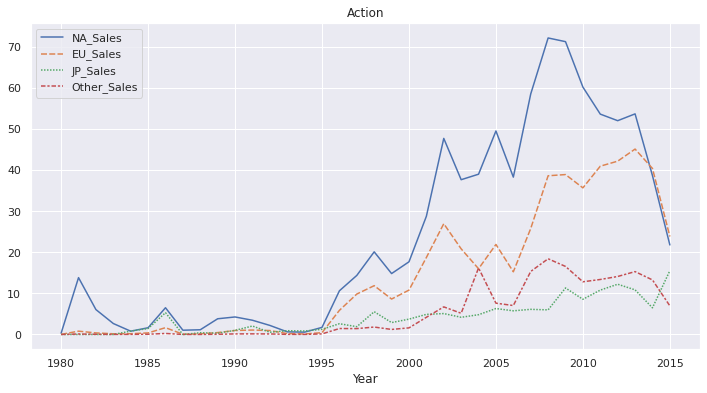

In [ ]:
genreplot('Action')

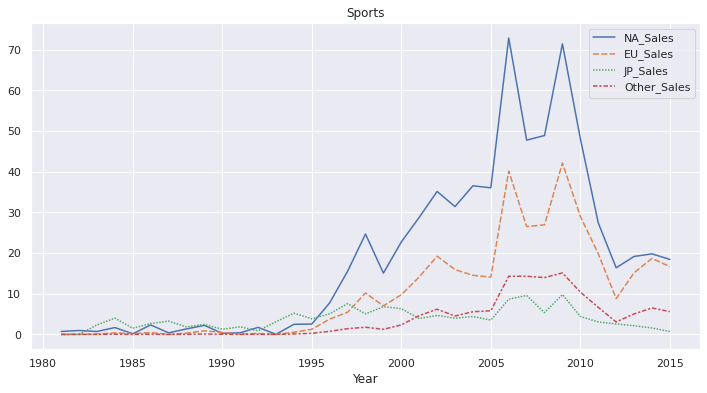

In [ ]:
genreplot('Sports')

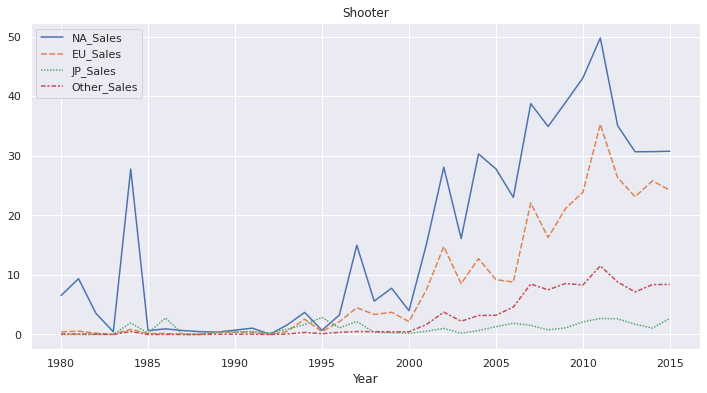

In [ ]:
genreplot('Shooter')

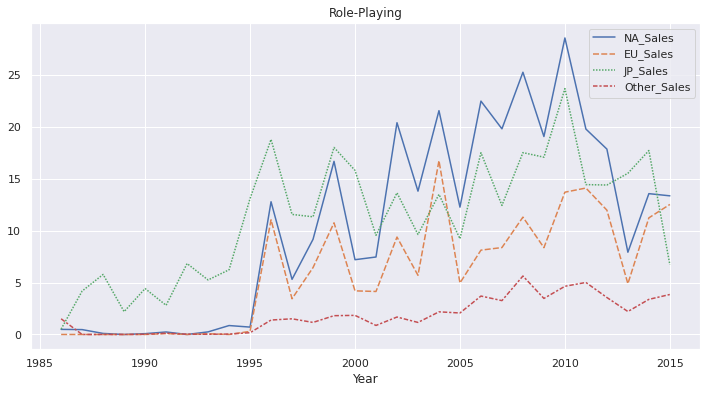

In [ ]:
genreplot('Role-Playing')

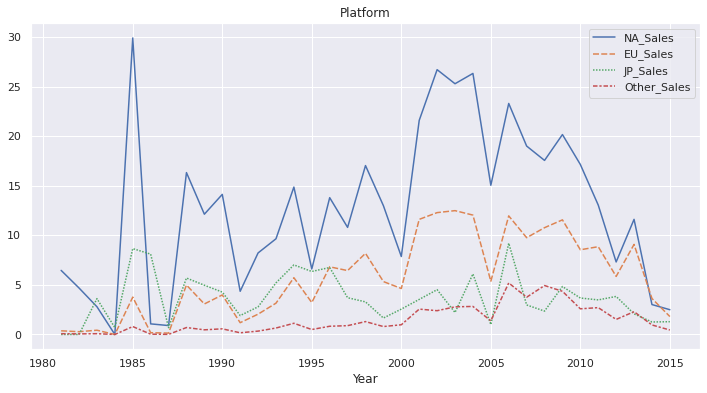

In [ ]:
genreplot('Platform')

### 3. 출고 게임의 플랫폼 확인
각 게임의 전체 매출액을 구하여 상위 50개 게임의 플랫폼을 확인한다.

In [ ]:
df['total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [ ]:
eda3 = pd.DataFrame(df.sort_values('total', ascending=False).head(50).\
                    Platform.value_counts()).reset_index()
eda3.columns = ['Platform', 'Counts']
eda3

,Platform,Counts
0,Wii,9
1,DS,9
2,X360,7
3,GB,6
4,PS2,5
5,PS3,4
6,NES,3
7,PS4,2
8,3DS,2
9,SNES,1


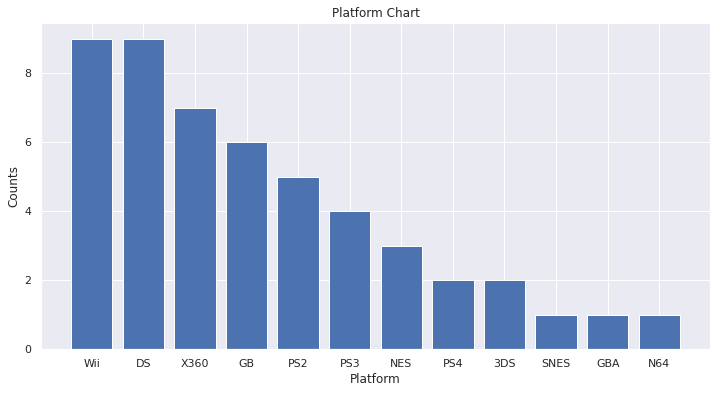

In [ ]:
x, y = eda3.Platform, eda3.Counts
plt.title('Platform Chart')
plt.bar(x, y)
plt.xlabel('Platform')
plt.ylabel('Counts')
plt.show();

# 결론
 세계적으로 인기가 많은 게임은 'Action', 'Sports', 'Shooting', 'Role-Playing', 'Platform'으로 나타났다.

 그러나 'Role-Playing'의 경우는 일본에서 특별히 높은 인기를 끈 반면
 
 'Shooting' 게임은 일본에서 인기가 적은 편으로,
 
 지역별로 인기 있는 게임이 다르다는 것을 알 수 있었다.

 이 중 'Shooting' 게임이 2015년 이후에도 상대적으로 높은 인기를 유지하고 있으며,
 
 매출 총액이 적었던 일본지역에서도 꾸준히 판매가 증가하고 있다.
 
 출고되었던 인기 게임의 플랫폼을 확인한 결과 Wii와 DS 등이 많은 점유를 하고 있다.

 이를 바탕으로 추후 게임을 출시하게 된다면
 
 Wii 또는 DS를 활용한 ‘Shooting’게임을 전 세계에 발매하면 높은 인기를 끌 수 있을 것이라고 생각한다.